In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
print('Load the Iris dataset')
iris = load_iris()
X = iris.data
y = iris.target

Load the Iris dataset


In [20]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\n1. DATASET INFORMATION")
print("-"*60)
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print(f"\nFirst few rows:")
print(df.head())

print("\n\nClass distribution:")
print(df['species_name'].value_counts())


1. DATASET INFORMATION
------------------------------------------------------------
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


Class distribution:
species_name
setosa        50
versicolor    50


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 105
Testing set size: 45


In [23]:
print("\n2. TRAINING NAÏVE BAYES CLASSIFIER")
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)


2. TRAINING NAÏVE BAYES CLASSIFIER


In [24]:
print("\n3. CONFUSION MATRIX")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


3. CONFUSION MATRIX

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [25]:
cm_df = pd.DataFrame(
    cm,
    index=['Actual ' + name for name in iris.target_names],
    columns=['Predicted ' + name for name in iris.target_names]
)
print("\nConfusion Matrix (with labels):")
print(cm_df)


Confusion Matrix (with labels):
                   Predicted setosa  Predicted versicolor  Predicted virginica
Actual setosa                    15                     0                    0
Actual versicolor                 0                    14                    1
Actual virginica                  0                     3                   12


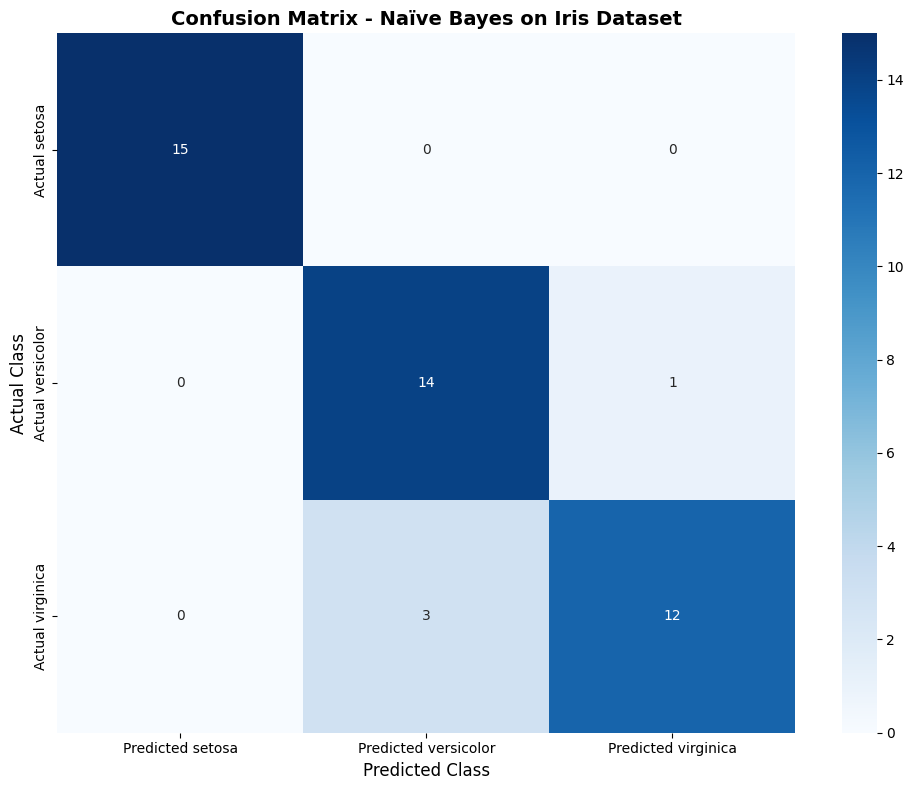

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Naïve Bayes on Iris Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()

In [31]:
print("\n4. PERFORMANCE METRICS FOR EACH CLASS")
for i, class_name in enumerate(iris.target_names):
    print(f"\n{class_name.upper()}:")    
    TP = cm[i, i]
    
    FP = cm[:, i].sum() - TP
    
    FN = cm[i, :].sum() - TP
    
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"True Positives (TP):  {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN):  {TN}")
    print(f"False Negatives (FN): {FN}")
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_rate = (FP + FN) / (TP + TN + FP + FN)
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nAccuracy:   {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Error Rate: {error_rate:.4f} ({error_rate*100:.2f}%)")
    print(f"Precision:  {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:     {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:   {f1_score:.4f}")


4. PERFORMANCE METRICS FOR EACH CLASS

SETOSA:
True Positives (TP):  15
False Positives (FP): 0
True Negatives (TN):  30
False Negatives (FN): 0

Accuracy:   1.0000 (100.00%)
Error Rate: 0.0000 (0.00%)
Precision:  1.0000 (100.00%)
Recall:     1.0000 (100.00%)
F1-Score:   1.0000

VERSICOLOR:
True Positives (TP):  14
False Positives (FP): 3
True Negatives (TN):  27
False Negatives (FN): 1

Accuracy:   0.9111 (91.11%)
Error Rate: 0.0889 (8.89%)
Precision:  0.8235 (82.35%)
Recall:     0.9333 (93.33%)
F1-Score:   0.8750

VIRGINICA:
True Positives (TP):  12
False Positives (FP): 1
True Negatives (TN):  29
False Negatives (FN): 3

Accuracy:   0.9111 (91.11%)
Error Rate: 0.0889 (8.89%)
Precision:  0.9231 (92.31%)
Recall:     0.8000 (80.00%)
F1-Score:   0.8571


In [32]:
print("\n5. OVERALL PERFORMANCE METRICS")

overall_accuracy = np.trace(cm) / np.sum(cm)
overall_error_rate = 1 - overall_accuracy

print(f"Overall Accuracy:   {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
print(f"Overall Error Rate: {overall_error_rate:.4f} ({overall_error_rate*100:.2f}%)")

precisions = []
recalls = []

for i in range(len(iris.target_names)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    precisions.append(precision)
    recalls.append(recall)

macro_precision = np.mean(precisions)
macro_recall = np.mean(recalls)
macro_f1 = 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall)

print(f"\nMacro-averaged Precision: {macro_precision:.4f} ({macro_precision*100:.2f}%)")
print(f"Macro-averaged Recall:    {macro_recall:.4f} ({macro_recall*100:.2f}%)")
print(f"Macro-averaged F1-Score:  {macro_f1:.4f}")

print("\n6. DETAILED CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


5. OVERALL PERFORMANCE METRICS
Overall Accuracy:   0.9111 (91.11%)
Overall Error Rate: 0.0889 (8.89%)

Macro-averaged Precision: 0.9155 (91.55%)
Macro-averaged Recall:    0.9111 (91.11%)
Macro-averaged F1-Score:  0.9133

6. DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [33]:
print("\n7. SUMMARY TABLE")
print("-"*60)
summary_data = []
for i, class_name in enumerate(iris.target_names):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_rate = (FP + FN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    summary_data.append({
        'Class': class_name,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Accuracy': f"{accuracy:.4f}",
        'Error Rate': f"{error_rate:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


7. SUMMARY TABLE
------------------------------------------------------------
     Class  TP  FP  TN  FN Accuracy Error Rate Precision Recall
    setosa  15   0  30   0   1.0000     0.0000    1.0000 1.0000
versicolor  14   3  27   1   0.9111     0.0889    0.8235 0.9333
 virginica  12   1  29   3   0.9111     0.0889    0.9231 0.8000


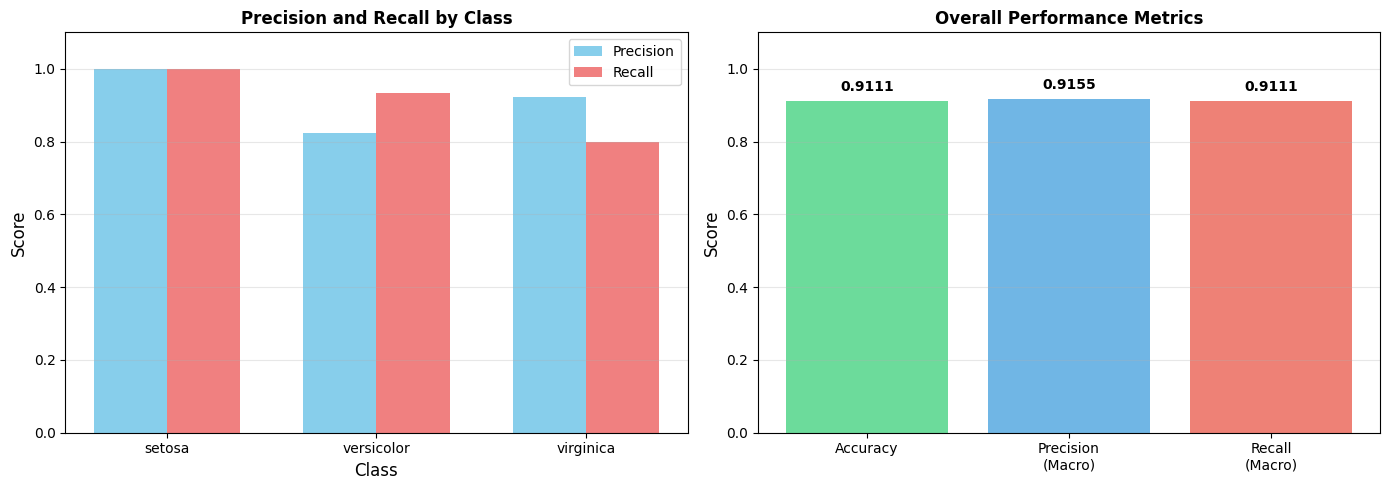

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics_df = pd.DataFrame({
    'Class': iris.target_names,
    'Precision': precisions,
    'Recall': recalls
})

x = np.arange(len(iris.target_names))
width = 0.35

axes[0].bar(x - width/2, precisions, width, label='Precision', color='skyblue')
axes[0].bar(x + width/2, recalls, width, label='Recall', color='lightcoral')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Precision and Recall by Class', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(iris.target_names)
axes[0].legend()
axes[0].set_ylim([0, 1.1])
axes[0].grid(axis='y', alpha=0.3)

metrics = ['Accuracy', 'Precision\n(Macro)', 'Recall\n(Macro)']
values = [overall_accuracy, macro_precision, macro_recall]
colors = ['#2ecc71', '#3498db', '#e74c3c']

axes[1].bar(metrics, values, color=colors, alpha=0.7)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Overall Performance Metrics', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(values):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()